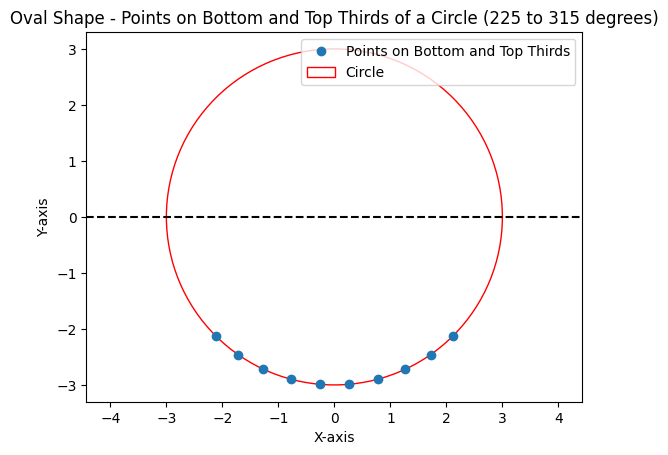

[-2.12132034 -1.72072931 -1.26785479 -0.77645714 -0.26146723  0.26146723
  0.77645714  1.26785479  1.72072931  2.12132034] [-2.12132034 -2.45745613 -2.71892336 -2.89777748 -2.98858409 -2.98858409
 -2.89777748 -2.71892336 -2.45745613 -2.12132034]


In [30]:
import numpy as np
import matplotlib.pyplot as plt

def points_on_bottom_and_top_third_of_circle(radius, num_points):
    theta = np.linspace(np.radians(225), np.radians(315), num_points)
    
    # Parametric equations for the bottom third of a circle
    x_bottom = radius * np.cos(theta)
    y_bottom = radius * np.sin(theta)
    
    # Mirror the bottom points to create the top points
    x_top = x_bottom
    y_top = -y_bottom + (y_bottom[0]*2)
    
    # Combine bottom and top points
    x_combined = np.concatenate([x_bottom, x_top])
    y_combined = np.concatenate([y_bottom, y_top])
    
    return x_combined, y_combined

# Example usage
radius = 3 #in
num_points = 10
x_points, y_points = points_on_bottom_and_top_third_of_circle(radius, num_points)
x_points, y_points = x_points[0:10], y_points[0:10]

# Plotting the points and the circle
plt.plot(x_points, y_points, 'o', label='Points on Bottom and Top Thirds')
circle = plt.Circle((0, 0), radius, color='r', fill=False, label='Circle')
plt.gca().add_patch(circle)
plt.axhline(0, color='k', linestyle='--')
plt.axis('equal')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Oval Shape - Points on Bottom and Top Thirds of a Circle (225 to 315 degrees)')
plt.legend()
plt.show()
print(x_points, y_points)

In [2]:
#Research Paper 1

# import numpy as np
# #InverseKinematics.py

# #Calculating the joint angles needed to achieve a certain position of the end effector (foot)
# #Given a desired position for the foot, compute the necessary angles for each servo in a leg.

# #Calculations derived from https://www.mdpi.com/2076-3417/12/9/4358

# def calculate_theta1(Px, Pz, L1, L2, L3):
#     # Calculate a and b
#     a = ((L1 / 2) * L2) - (Px * L2) + (L2 * L3)
#     b = Px**2 - 2 * Px * (L1 / 2) - 2 * Px * L3 + Pz**2 + (L1 / 2)**2 + L1 * L3 + L3**2

#     # Calculate sθ1 and cθ1
#     s_theta1 = ((L1 / 2) - Px + L3) * a / (Pz * b - (L2 / 2) * Pz)
#     c_theta1 = a + Pz * np.sqrt(b - L2**2) / b

#     # Calculate θ1
#     theta1 = np.arctan2(s_theta1, c_theta1)

#     return theta1

# def calculate_theta2(Px, Pz, L1, L5):
#     # Calculate c and d
#     c = -4 * Px**2 - 8 * Px * (L1 / 2) - 4 * Pz**2 + L5**2 - 4 * (L1 / 2)**2
#     d = Px**2 + 2 * Px * (L1 / 2) + Pz**2 + (L1 / 2)**2
#     print(c)
#     # Calculate sθ2 and cθ2
#     s_theta2 = Pz * (L5 + np.sqrt(d)) / (2 * d)
#     c_theta2 = (Px + (L1 / 2)) * (L5 + np.sqrt(c)) / (2 * d)

#     # Calculate θ2
#     theta2 = np.arctan2(s_theta2, c_theta2)

#     return theta2

# ##Testing the functions
# # Define link lengths and foot position (replace with actual values)
# L1, L2, L3, L5 = 1.93, .869, 3.119, 0.869 #in

# theta1 = calculate_theta1(-1, 0.0001,L1, L2, L3)
# theta2 = calculate_theta2(-1, 0.0001, L1, L5)

# print(f"Theta1: {np.degrees(theta1)} degrees")
# print(f"Theta2: {np.degrees(theta2)} degrees")

# for Px,Pz in zip(x_points, y_points):
#     # Calculate joint angles
#     theta1 = calculate_theta1(Px, Pz, L1, L2, L3)
#     theta2 = calculate_theta2(Px, Pz, L1, L5)

#     # Print the results
#     print(f"Theta1: {np.degrees(theta1)} degrees")
#     print(f"Theta2: {np.degrees(theta2)} degrees")

In [31]:
#Second Research Paper
l, l1, l2 = 1.93, .869, 3.119 #in


def inverse_kinematics(x, y):
    # Calculating distances AC and EC using the given positions of the foot-end point C (x, y)
    l_AC = np.sqrt(x**2 + y**2)
    l_EC = np.sqrt((x - l)**2 + y**2)

    # Using cosine law to find the angles, with inputs clipped to [-1, 1]
    cos_CAE = np.clip((l_AC**2 + l**2 - l_EC**2) / (2 * l * l_AC), -1, 1)
    cos_CEA = np.clip((l_EC**2 + l**2 - l_AC**2) / (2 * l * l_EC), -1, 1)
    cos_BAC = np.clip((l1**2 + l_AC**2 - l2**2) / (2 * l1 * l_AC), -1, 1)
    cos_CED = np.clip((l1**2 + l_EC**2 - l2**2) / (2 * l1 * l_EC), -1, 1)

    # Calculating the angles using np.arccos with clipped inputs
    angle_CAE = np.arccos(cos_CAE)
    angle_CEA = np.arccos(cos_CEA)
    angle_BAC = np.arccos(cos_BAC)
    angle_CED = np.arccos(cos_CED)

    # Calculating theta1 and theta2
    theta1 = np.rad2deg(angle_CAE + angle_BAC)
    theta2 = np.rad2deg(np.pi - angle_CEA - angle_CED)

    return theta1, theta2
    
# theta1 = calculate_theta1(0.001, 0.001)
# theta2 = calculate_theta2(0.001, 0.001)

# print(f"Theta1: {np.degrees(theta1)} degrees")
# print(f"Theta2: {np.degrees(theta2)} degrees")

for Px,Py in zip(x_points, y_points):
    # Calculate joint angles
    theta1, theta2 = inverse_kinematics(Px, -Py)

    # Print the results
    print(f"Theta1: degrees {round(theta1,2)} Theta2: {round(theta2,2)} degrees")
    
#Angles look Good!

Theta1: degrees 224.7 Theta2: 152.36 degrees
Theta1: degrees 214.7 Theta2: 146.05 degrees
Theta1: degrees 204.7 Theta2: 139.63 degrees
Theta1: degrees 194.7 Theta2: 121.38 degrees
Theta1: degrees 184.7 Theta2: 83.92 degrees
Theta1: degrees 174.7 Theta2: 56.63 degrees
Theta1: degrees 164.7 Theta2: 29.71 degrees
Theta1: degrees 154.7 Theta2: 0.11 degrees
Theta1: degrees 144.7 Theta2: -37.53 degrees
Theta1: degrees 134.7 Theta2: -95.15 degrees


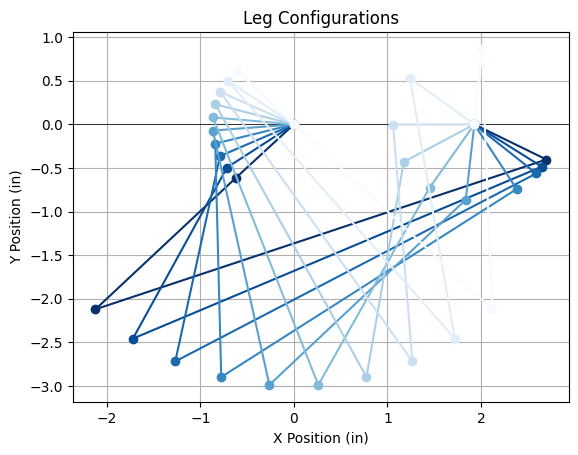

In [29]:
def plot_leg_configurations(l, l1, l2, x_points, y_points):
    # Prepare plot
    fig, ax = plt.subplots()
    ax.set_title('Leg Configurations')
    ax.set_xlabel('X Position (in)')
    ax.set_ylabel('Y Position (in)')
    ax.grid(True)
    ax.axhline(0, color='black', linewidth=0.5)

    # Generate colors
    colors = [plt.cm.Blues(i) for i in np.linspace(1, 0, len(x_points))]

    for i, (Px, Py) in enumerate(zip(x_points, y_points)):
        theta1, theta2 = inverse_kinematics(Px, Py)

        # Calculate the positions of the joints
        joint_A = np.array([0, 0])  # Servo position
        joint_B = joint_A + np.array([l1 * np.cos(np.deg2rad(theta1)), l1 * np.sin(np.deg2rad(theta1))])
        joint_E = np.array([l, 0])  # The other servo position
        joint_D = joint_E + np.array([-l1 * np.cos(np.deg2rad(theta2)), -l1 * np.sin(np.deg2rad(theta2))])
        foot_C = np.array([Px, Py])

        # Plot the leg configuration
        ax.plot([joint_A[0], joint_B[0], foot_C[0], joint_D[0], joint_E[0]],
                [joint_A[1], joint_B[1], foot_C[1], joint_D[1], joint_E[1]],
                'o-', color=colors[i])

    # Show plot
    plt.show()

# Given test points in inches
# x_points = np.linspace(2, 4, 5)  # Example x coordinates
# y_points = np.linspace(-1, -2, 5)  # Example y coordinates

# Call the plotting function with the provided leg parameters and test points
plot_leg_configurations(l, l1, l2, x_points, y_points) #Works!

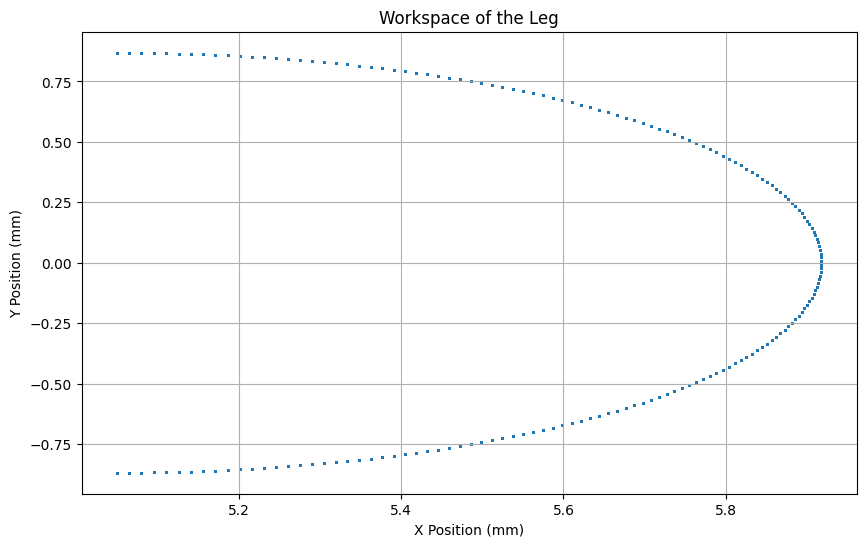

In [6]:
theta1_range = np.linspace(-90, 90, 180)  # operational range of theta1
theta2_range = np.linspace(-90, 90, 180)  # operational range of theta2

X = []
Y = []

# Corrected calculation for the position of the foot-end
for theta1 in theta1_range:
    for theta2 in theta2_range:
        # Convert angles from degrees to radians for calculation
        theta1_rad = np.deg2rad(theta1)
        theta2_rad = np.deg2rad(theta2)

        # Correcting np.arccos usage
        angle_cos = np.clip((l1**2 + l2**2 - l**2) / (2 * l1 * l2), -1, 1)
        x = l + l1 * np.cos(theta2_rad) + l2 * np.cos(np.arccos(angle_cos))
        y = l1 * np.sin(theta2_rad) + l2 * np.sin(np.arccos(angle_cos))
        
        X.append(x)
        Y.append(y)

# Plotting the workspace
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, s=1)
plt.title('Workspace of the Leg')
plt.xlabel('X Position (mm)')
plt.ylabel('Y Position (mm)')
plt.grid(True)
plt.show()

####NOTE This plot does not make sense to me (Gerald)